# Imports

In [1]:
import pandas as pd
import matplotlib
import logging

from pprint import pprint

# Enviroment Setup

In [5]:
logging_config = {
        'version': 1,
        'formatters': {
            'default': {
                'format': '%(asctime)s - %(levelname)s - %(message)s',
                'datefmt': '%Y-%m-%d %H:%M:%S'
            }
        },
        'handlers': {
            'console': {
                'level': 'DEBUG',
                'class': 'logging.StreamHandler',
                'formatter': 'default',
                'stream': 'ext://sys.stdout'
            }
        },
        'loggers': {
            'default': {
                'level': 'DEBUG',
                'handlers': ['console']
            }
        },
        'disable_existing_loggers': False
    }

In [8]:
logging.config.dictConfig(logging_config)
logger = logging.getLogger('default')

In [9]:
logger.info('some bullshit')

2023-08-18 20:51:02 - INFO - some bullshit


# Functions, Classes & Constants

## Functions

In [16]:
def normalize_yearly_earning(df_row: pd.core.series.Series) -> None:
    """Computes an estimated full year Gross365 for cars that have been on the market
    for less than a year
    """
    # pprint(df_row)
    if df_row['Days'] > 365:
        df_row['Gross365_estimated'] = df_row['Gross365']
    else:
        try:
            df_row['Gross365_estimated'] = df_row['Gross365'] / (365 / df_row['Gross365'])
        except ZeroDivisionError:
            df_row['Gross365_estimated'] = df_row['Gross365']

    return df_row

## Classes

## Constants

In [3]:
turo_data_file = "/Users/karim/Downloads/Turo-Explorer-Data-montreal-20230818.csv"

In [4]:
turo_df = pd.read_csv(turo_data_file)

# Workflow 1: Get unique makes (car brands) from data pull

In [10]:
all_makes = turo_df["Make"].unique()

In [11]:
print(f"There are {len(all_makes)} car makes in on all_make")
pprint(all_makes)

There are 36 car makes in on all_make
array(['Ram', 'BMW', 'Chrysler', 'Nissan', 'Toyota', 'FIAT', 'Porsche',
       'Mercedes-Benz', 'Audi', 'Hyundai', 'Honda', 'Volkswagen',
       'Lincoln', 'Chevrolet', 'Ford', 'Volvo', 'Jeep', 'Subaru', 'Lexus',
       'Cadillac', 'Mazda', 'Jaguar', 'Mitsubishi', 'Buick', 'Kia',
       'smart', 'Scion', 'Genesis', 'Maserati', 'Dodge', 'MINI', 'Acura',
       'Tesla', 'INFINITI', 'Land Rover', 'GMC'], dtype=object)


# Worlflow 2: How many records of each car make in the dataset

In [12]:
unique_makes_counts = turo_df['Make'].value_counts()
unique_makes_perc = turo_df['Make'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

unique_makes_breakdown = pd.concat([unique_makes_counts, unique_makes_perc], axis = 1, keys=['count', 'percentage'])
pprint(unique_makes_breakdown[:10])

"""
To represent value_counts as stats: https://www.statology.org/pandas-value_counts-percentage/#:~:text=You%20can%20use%20the%20value_counts,given%20column%20of%20a%20DataFrame.
"""

               count percentage
Toyota            49      10.3%
Honda             42       8.8%
Nissan            41       8.6%
Hyundai           41       8.6%
Mercedes-Benz     30       6.3%
Tesla             26       5.5%
Kia               24       5.1%
BMW               22       4.6%
Chevrolet         22       4.6%
Volkswagen        21       4.4%


'\nTo represent value_counts as stats: https://www.statology.org/pandas-value_counts-percentage/#:~:text=You%20can%20use%20the%20value_counts,given%20column%20of%20a%20DataFrame.\n'

# Workflow 3: How does daily rate correlate with total yearly revenue


<AxesSubplot:xlabel='Gross365', ylabel='$day'>

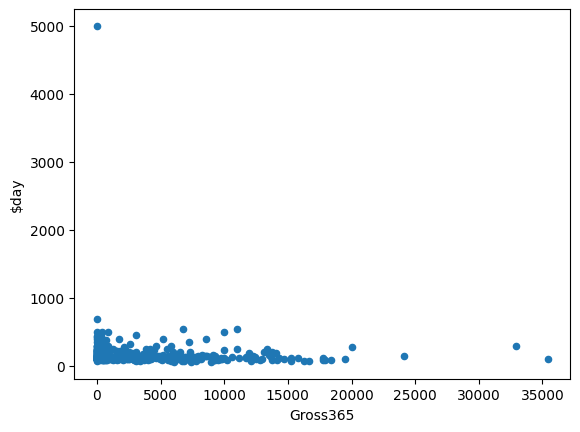

In [13]:
turo_df.plot.scatter('Gross365', '$day')

There no discernable relation and that is because the data doesn't take into account  
how many days the car has been in the market

# Worflow 4: What is the distibution of the number of days that the cars have been available?

<AxesSubplot:ylabel='Frequency'>

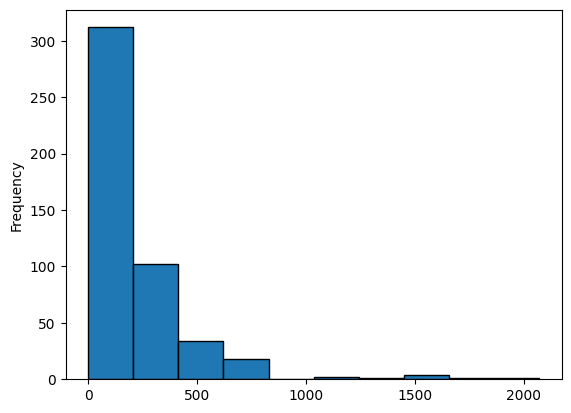

In [14]:
"""
Documentation on creating histograms of data distributions:
https://sparkbyexamples.com/pandas/plot-distribution-of-column-values-in-pandas/


"""
turo_df['Days'].plot(kind='hist', edgecolor='black')

# Workflow 5: Normalize Gross365 field for cars that have been on the market for less than a year

In [17]:
turo_df = turo_df.apply(normalize_yearly_earning, axis=1)

# Workflow 6: Correlation between $rate and Gross365_estimated

<AxesSubplot:xlabel='Gross365_estimated', ylabel='$day'>

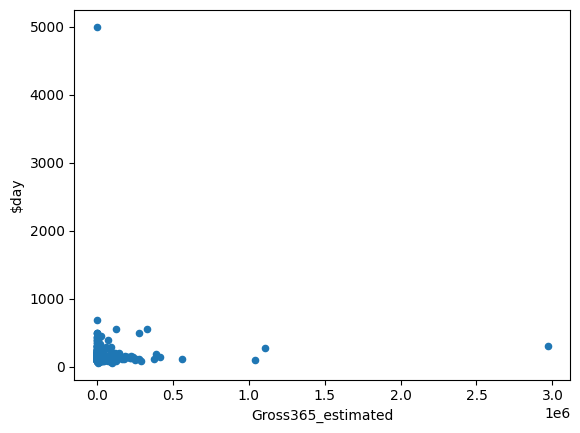

In [18]:
turo_df.plot.scatter('Gross365_estimated', '$day')

# Debug

In [78]:
turo_df.loc[100]

ID                                                            2139993
City                                                        Laval, QC
Type                                                              CAR
Make                                                            Honda
Model                                                           Civic
Year                                                             2022
Color                                                             NaN
Trim                                                            Sport
CreatedAt                                                   7/23/2023
Days                                                               26
Trips                                                               0
T/D                                                               0.0
$day                                                              250
Busy30                                                              0
Gross30             

In [13]:
# len(turo_df) # 475 rows

In [18]:
turo_df.columns
"""
Index(['ID', 'City', 'Type', 'Make', 'Model', 'Year', 'Color', 'Trim',
       'CreatedAt', 'Days', 'Trips', 'T/D', '$day', 'Busy30', 'Gross30',
       'Gross365', 'Plan', 'Favs', 'Reviews', 'StarHost', 'URL', 'Features',
       'Avg Market $*', 'Depreciation Y1*', 'Insurance Y*', 'Maintenance Y*',
       'Avg Repairs Y*'],
      dtype='object')
"""


"\nIndex(['ID', 'City', 'Type', 'Make', 'Model', 'Year', 'Color', 'Trim',\n       'CreatedAt', 'Days', 'Trips', 'T/D', '$day', 'Busy30', 'Gross30',\n       'Gross365', 'Plan', 'Favs', 'Reviews', 'StarHost', 'URL', 'Features',\n       'Avg Market $*', 'Depreciation Y1*', 'Insurance Y*', 'Maintenance Y*',\n       'Avg Repairs Y*'],\n      dtype='object')\n"

In [19]:
max(turo_df['Gross365_estimated'])

2970195.8246575342

In [36]:

temp_record_2065086 = turo_df[turo_df['ID']==2065086]
temp_record_2065086[['Days', 'Trips', 'Gross365','Make','$day']]

,Days,Trips,Gross365,Make,$day
458,73,3,2447,BMW,150


In [39]:
2447/150/3

5.437777777777778